# *`08_Ensemble Learning`*

#### **What is Ensemble Learning ?**

\
Ensemble learning is a machine learning technique that is a combination of the predictions of multiple models to increase the accuracy of predictions. The main idea behind ensemble learning is to combine the strengths of diverse models to elevate overall performance.

* It is a grouping of different Machine Learning Algorithms.
* Ensemble learning is totally based on the `wisdom of crowd` principle.
* It means the crowd knows more than an individual.

\
**Core Idea**

Ensemble learning differs in the way it works for below phases:
1. Training
2. Prediction

#### **1. Training**

<image>

\
Ensemble learning can be applied in the following ways:
1. Using same algorithm but different data.

$$M_1 = M_2 = M_3 .... = M_n$$

2. Using different algorithm but same data.

$$M_1 \neq M_2 \neq M_3 .... \neq M_n$$

3. Using different algorithm and different data.

\
> ***Prediction for Classification setting***

Let's say a new query point $x_p$ comes, we will pass it to all the models:
<image>

e.g: We have created an Ensemble of 5 models.
* 3 models have predicted $'1'$ for the data point $x_p$.
* 2 models have predicted $'0'$ for the data point $x_p$.

The overall outcome will depend on majority. Hence, the output will be $'1'$.

\
> ***Prediction for Regression setting***

For a regression setting, the prediction is a continuous number therefore, we take the mean of the outputs.

$\text {final prediction} = \sum_{i = 1}^{n} \frac {Prediction_i}{n}$

<image>

\
### **Types of Ensemble Learning**
1. Voting Ensemble
2. Bagging Ensemble -(Random Forest)
3. Boosting Ensemble - (Gradient Bossting, AdaBoost,, XGBoost)
4. Stacking

\
### Why Ensemble Works?

It takes multiple models and removes the noise as much as possible.
<image>
<image>

**Benefits**
1. Improvements in performance
2. Bias Variance is reduced - (low bias and low variance)
3. Robustness




## **Voting Ensemble**

**Core Idea** The data is provided to $n$ no. of models.

Base models are different algorithms.The data provided for to the algorithms is same.

<image>

> **ASSUMPTIONS FOR VOTING**

* The base models should be as dissimilar as possible.
* If models are similar Voting wouldn't work.
* Individual models should have accuracy greater than 51%

> **Mathematical Intuition**

Let's say we have an Ensemble of 3 models for a classification problem with 2 classes - $M1, M2 \text { and } M3$

> $\text {prob of right} = 0.4 \\
\text {prob of right} = 0.6 $

Below are the all possible outcomes of the models with above probabilities:
<image>

For the voting algorithm to work, we need cases where the individual accuracy was above $50%$ and two classifiers with same accuracy. We get 4 such cases as mentioned:

| M1(acc)>50% | M2(acc)>50% | M3(acc)>50% | Total Accuracy |
| --- | --- | --- | --- |
| 0.6 | 0.6 | 0.6 | 0.216 |
| 0.6 | 0.6 | 0.4 | 0.144 |
| 0.6 | 0.4 | 0.6 | 0.144 |
| 0.4 | 0.6 | 0.6 | 0.144 |
| --- | --- | --- | --- |
| **Total** | **Model** | **Accuracy:**| **0.648 ~ 64%**|

If we take the indiviual accuracies less than 50%, overall accuracy would also appear to be less. Let's check the cases where individual accuracy is less than 50% with majority:

| M1(acc)<50% | M2(acc)<50% | M3(acc)<50% | Total Accuracy |
| --- | --- | --- | --- |
| 0.4 | 0.4 | 0.4 | 0.064 |
| 0.4 | 0.4 | 0.6 | 0.096 |
| 0.4 | 0.6 | 0.4 | 0.096 |
| 0.6 | 0.4 | 0.4 | 0.096 |
| --- | --- | --- | --- |
| **Total** | **Model** | **Accuracy:**| **0.352 ~ 35%** |

\
> **Hard Voting Vs. Soft Voting**

This is a hyperparameter we need to tune it.

| |Hard Voting | Soft Voting |
| --- |--- | --- |
|1. | In hard voting, we compare the probabilties of each class. | In soft voting, we find the mean of probabilities for each class. |
|2. | The class with higher probabilties will be outputted. | The class with higher probability will be selected as teh output. |


In [49]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [8]:
# Lets check an example of how voting ensemble works
iris_data = datasets.load_iris()

# Turn the raw data into a pandas dataframe
df = pd.DataFrame(iris_data['data'], columns = iris_data['feature_names'])
df['target'] = iris_data['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [11]:
df['target'].value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [12]:
# Split the data into X and y
X = df.drop('target', axis = 1)
y = df['target']

In [20]:
# Instantiate the objects of the classifiers going to be the part of ensembling
clf1 = LogisticRegression(max_iter = 200)
clf2 = RandomForestClassifier()
clf3 = KNeighborsClassifier()

# Create a list of estimators consisting of the algorithms for ensemble
estimators = [('lr' , clf1), ('rf', clf2), ('knn', clf3)]

# Initiate an object of Voting CLassifier
voting_classifier = VotingClassifier(estimators = estimators,
                                     voting = 'hard',
                                     weights = [1, 2, 3]) # importance given for each model's prediction

# Find the cross validation score
cv = cross_val_score(voting_classifier,
                     X, y,
                     scoring = 'accuracy')

# Print the score
print(f'Accuracy Score: {np.round(np.mean(cv), 2)}')

Accuracy Score: 0.98


## **Bagging Ensemble**

**Core idea** Bagging is the combination of Bootstrapping and Aggregation.

> **Boostrapping**

It is a technique of drawing random samples from a given population `(with/ without replacement)`.

All the models in bagging ensemble should be same.

* The base models in bagging ensembles are models having `Low Bias and High Variance`, such as: SVM, KNN, DT, etc.
* Even if the data is changed, it will not create huge impact on output because of bootstrapping, as new data points will be distributed.

> **Bagging**

Row sampling with replacement. e.g. `df.sample(replace = True)`

> **Pasting**

Row sampling without replacement. e.g. `df.sample()`

> **Random subspaces**

Column sampling with/ without replacement. e.g. `df.sample(2, replace = True, axis = 1)`

> **Random Patches**

Row sampling and column sampling. e.g. `df.sample(8, replace = True).sample(2, replace = True, axis = 1)`

Mostly we use - Decision Trees or KNearestNeighbors. Rarely, Support Vector Machines are used.


**Important Points**

* Bagging generally gives better results than pasting.
* Good results come around the 25% to 50% row sampling.
* Random patches and subspaces should be used while dealing with high dimensional data.
* To find correct hyperparameter use GridSearchCV, RandomSearchCV

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Initialize BaggingClassifier
bag_clf = BaggingClassifier(estimator=KNeighborsClassifier(),
                            bootstrap=False,
                            n_estimators=10,
                            random_state=0)

# Fit the BaggingClassifier
bag_clf.fit(X, y)

print(f'Accuracy Score: {bag_clf.score(X,y)}')

# Print estimator samples
print(f"Estimator Samples : \n{bag_clf.estimators_samples_}")
# Print estimator features
print(f"\n\nEstimator Features : \n{bag_clf.estimators_features_}")

Accuracy Score: 0.9666666666666667
Estimator Samples : 
[array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18

## **Random Forest**

Random forest is a type of bagging ensemble. It can be used for both regression and classification problems.

If in bagging the base estimator is selected as Decision Trees then, it is Random Forest.



In [52]:
n_train = 150
n_test = 1000
noise = 0.1

# Generate data
def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 2) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 2) ** 2)\
        + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))

    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

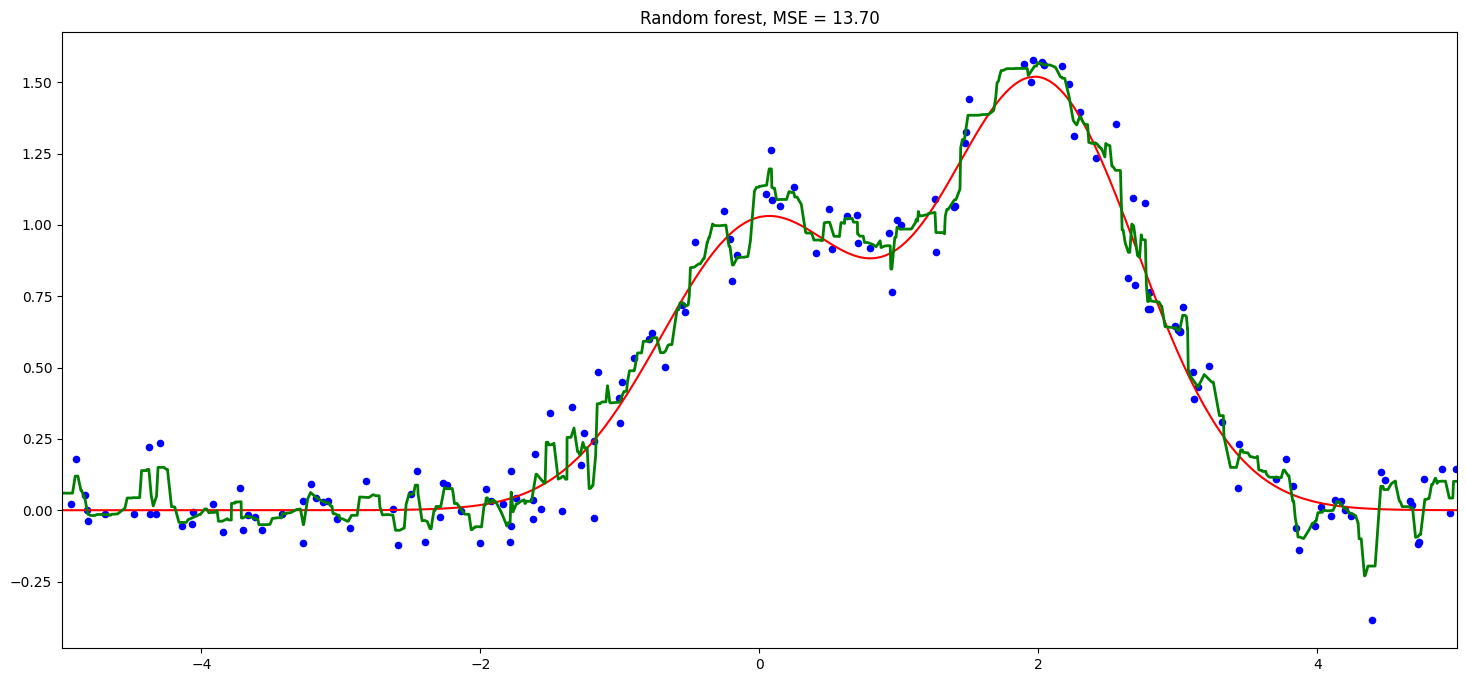

In [53]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
rf_predict = rfr.predict(X_test)

plt.figure(figsize=(18, 8))
plt.plot(X_test, f(X_test), "r")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, rf_predict, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Random forest, MSE = %.2f" % np.sum((y_test - rf_predict) ** 2));